In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Loading dataset

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


checking datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


no null value found....

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


EDA(exploratory data anlaysis)

Correlation check

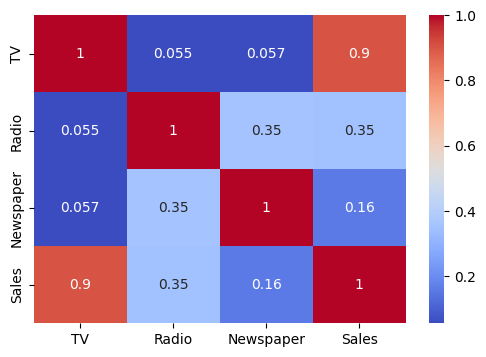

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


Tv vs sales

feature and target

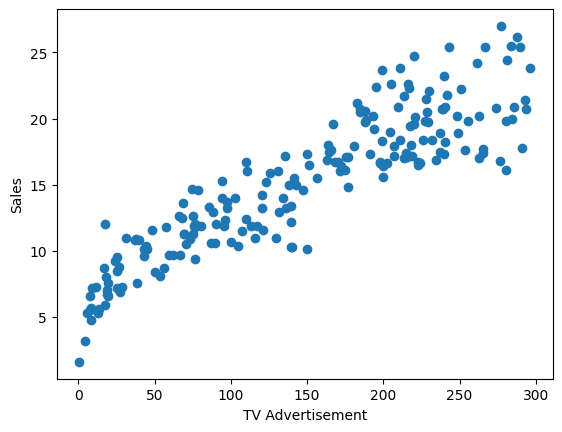

In [9]:
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV Advertisement")
plt.ylabel("Sales")
plt.show()


In [12]:
X = df.drop("Sales", axis=1)
y = df["Sales"]


spliting train test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model train build and train

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

prediction

In [15]:
y_pred = model.predict(X_test)


Model evaluation

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.2748262109549338
RMSE: 1.7052146229349223
R2 Score: 0.9059011844150826


actual and predicted graph


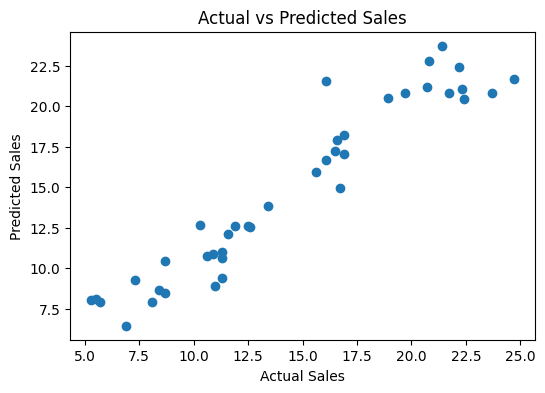

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Based on the R2 score of approximately 0.906, which is quite high, the graph likely shows that the predicted sales are very close to the actual sales, indicating that your linear regression model is performing well in predicting sales.



prediction with new data ...


In [18]:
new_data = pd.DataFrame({
    "TV": [150],
    "Radio": [25],
    "Newspaper": [30]
})

prediction = model.predict(new_data)
print("Predicted Sales:", prediction[0])


Predicted Sales: 15.544250492282009
